### 1. Import Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import sklearn.metrics

### 2. Configure and Load Dataset

In [42]:
housing = fetch_california_housing(as_frame=True)

In [43]:
print(housing)

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

In [84]:
df = pd.DataFrame(housing.data)

In [85]:
# Add target column
df['Price'] = housing.target

In [86]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 3. Examine Data

In [54]:
df.shape

(20640, 9)

In [53]:
# Confirm NA values
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [55]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [59]:
# Examine Correlation Between Features
correlation = df.corr()

<Axes: >

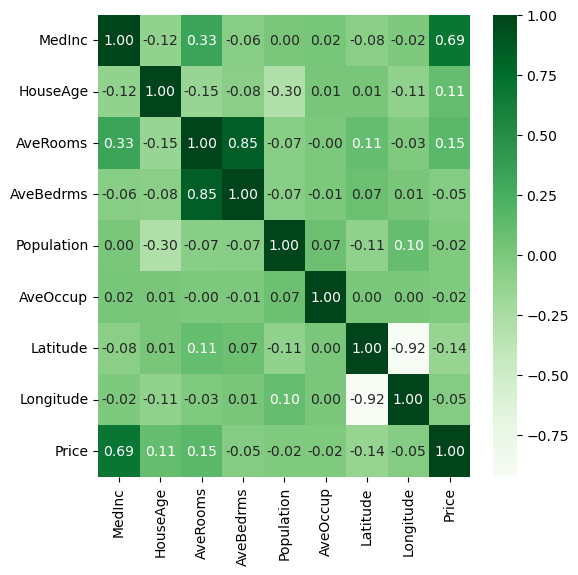

In [79]:
plt.figure(figsize=(6,6))   # Adjust size (not required)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='Greens')    # Annotate (corr scores); fmt (decimals)

In [89]:
X = df.drop('Price', axis=1)
y = df['Price']
print(X)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=34)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18576, 8) (2064, 8) (18576,) (2064,)


### 4. Create and Analyze Model

In [115]:
model = XGBRegressor()

In [116]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [117]:
# Training Scores
train_preds = model.predict(X_train)
r2_score = metrics.r2_score(y_train, train_preds) # R2 Score
mse_score = metrics.mean_squared_error(y_train, train_preds) # MSE
print('r2 score: ', r2_score)
print('MSE: ', mse_score)

r2 score:  0.9396170475421677
MSE:  0.08003024660513457


In [118]:
# Test Scores
test_preds = model.predict(X_test)
r2_score = metrics.r2_score(y_test, test_preds) # R2 Score
mse_score = metrics.mean_squared_error(y_test, test_preds) # MSE
print('r2 score: ', r2_score)
print('MSE: ', mse_score)

r2 score:  0.8573800952332875
MSE:  0.19781729740844978


### Visualizing Model Performance

Text(0.5, 1.0, 'Training: Predicted vs Actual prices')

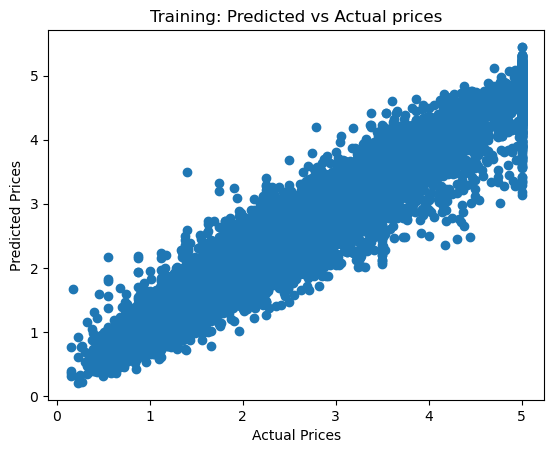

In [127]:
plt.scatter(y_train, train_preds)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Training: Predicted vs Actual prices')

Text(0.5, 1.0, 'Testing: Predicted vs Actual prices')

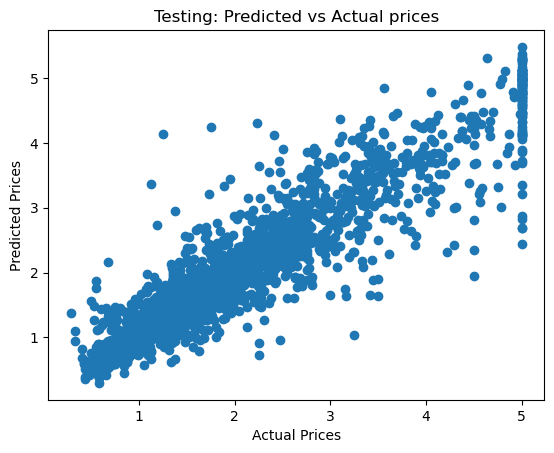

In [126]:
plt.scatter(y_test, test_preds)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Testing: Predicted vs Actual prices')